In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df=pd.read_excel("ГодСветИсправл.xlsx")

In [43]:
year = []
month = []
day = []
hour = []
for i in df['Data']:
    year.append(i.year)
    month.append(i.month)
    day.append(i.day)
    hour.append(i.hour)

In [44]:
df2 = pd.DataFrame({'hour': hour, 'day': day,'month': month,'year': year})

In [51]:
z=[#'Data', 
    'Потребление', 
     'Ставка', 'Te', #'Po ', ' P ','Pa ','Ff '
     ' U ', 'Рабочий/Выходной', 'КвадратТемпературы', 'Тренд',
       'СтавкаМощн', 'Месяц', 'Ставка(t-1)', '0', '1', '2', '3', '4', '5', '6',
       '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '20', '21', '22', '23', 'M', 'T', 'W', 'Th', 'F', 'Sa', 'Su',
       'Sunrise', 'Sunset', 'Daylength']
df3 = df[z]

df3['hour'] =  hour
df3['day'] =  day
df3['month'] =  month
df3['year'] =  year

C:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [53]:
df3.columns

Index(['Потребление', 'Ставка', 'Te', ' U ', 'Рабочий/Выходной',
       'КвадратТемпературы', 'Тренд', 'СтавкаМощн', 'Месяц', 'Ставка(t-1)',
       '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', 'M',
       'T', 'W', 'Th', 'F', 'Sa', 'Su', 'Sunrise', 'Sunset', 'Daylength',
       'hour', 'day', 'month', 'year'],
      dtype='object')

In [54]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import string as string
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
inputdf = df.filter(items=['Потребление', 'Ставка', 'Te', ' U ', 'Рабочий/Выходной',
       'КвадратТемпературы', 'Тренд', 'СтавкаМощн', 'Месяц', 'Ставка(t-1)',
       '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', 'M',
       'T', 'W', 'Th', 'F', 'Sa', 'Su', 'Sunrise', 'Sunset', 'Daylength',
       'hour', 'day', 'month', 'year'])
features=inputdf
type(features)
#features.iloc[:,5:].head(5)
#features.head(5)
#features.info()
#features.columns
# Метки - это значения, которые мы хотим предсказать
labels = np.array(features['Потребление'])
# Удалить ярлыки из функций
# ось 1 относится к столбцам
features= features.drop('Потребление', axis = 1)
# Сохранение имен объектов для последующего использования
feature_list = list(features.columns)
# Преобразовать в массив NumPy
features = np.array(features)
# Использование Scikit-learn для разделения данных на обучающие и тестовые наборы
from sklearn.model_selection import train_test_split
# Разделить данные на обучающие и тестовые наборы
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.0849,random_state = 100)
print('Форма признаков обучения:', train_features.shape)
print('Форма меток обучения:', train_labels.shape)
print('Форма признаков тестирования:', test_features.shape)
print('Форма меток тестирования:', test_labels.shape)

Форма признаков обучения: (8016, 43)
Форма меток обучения: (8016,)
Форма признаков тестирования: (744, 43)
Форма меток тестирования: (744,)


In [55]:
# Импортируем используемую модель
from sklearn.ensemble import RandomForestRegressor
# Создание модели с 100 деревьями решений
#rf = RandomForestRegressor(n_estimators = 100, random_state = 100)
rf = RandomForestRegressor(n_estimators = 200, random_state = 42)
# Обучаем модель по выборки обучения
rf.fit(train_features, train_labels);

# Используйте метод прогнозирования леса на тестовых данных
predictions = rf.predict(test_features)
# Рассчитать абсолютные ошибки
errors = abs(predictions - test_labels)
# Вывести среднюю абсолютную ошибку (мАе)
print('Средняя абсолютная ошибка:', round(np.mean(errors), 2), 'кВт.')


# Рассчитать среднюю абсолютную процентную ошибку (MAPE)
mape = 100 * (errors / test_labels)
# Расчет и отображение точности
accuracy = 100 - np.mean(mape)
print('Точность:', round(accuracy, 2), '%.')
# Импорт инструментов, необходимых для визуализации
from sklearn.tree import export_graphviz
#import pydot
# Вытащи одно дерево из леса
tree = rf.estimators_[5]

# Получить числовые значения функций
importances = list(rf.feature_importances_)
# Список кортежей с переменной и важностью
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# # Сортировать значения функций по наиболее важным
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Распечатать функцию и значение
[print('Переменные: {:20} Важность: {}'.format(*pair)) for pair in feature_importances];

Средняя абсолютная ошибка: 1.91 кВт.
Точность: 91.82 %.
Переменные: Sunset               Важность: 0.38
Переменные:  U                   Важность: 0.08
Переменные: Te                   Важность: 0.07
Переменные: КвадратТемпературы   Важность: 0.04
Переменные: 15                   Важность: 0.04
Переменные: 16                   Важность: 0.04
Переменные: СтавкаМощн           Важность: 0.03
Переменные: 14                   Важность: 0.03
Переменные: 17                   Важность: 0.03
Переменные: Sunrise              Важность: 0.03
Переменные: Daylength            Важность: 0.03
Переменные: Ставка               Важность: 0.02
Переменные: Тренд                Важность: 0.02
Переменные: 0                    Важность: 0.02
Переменные: 13                   Важность: 0.02
Переменные: 21                   Важность: 0.02
Переменные: 22                   Важность: 0.02
Переменные: 23                   Важность: 0.02
Переменные: Месяц                Важность: 0.01
Переменные: Ставка(t-1)         

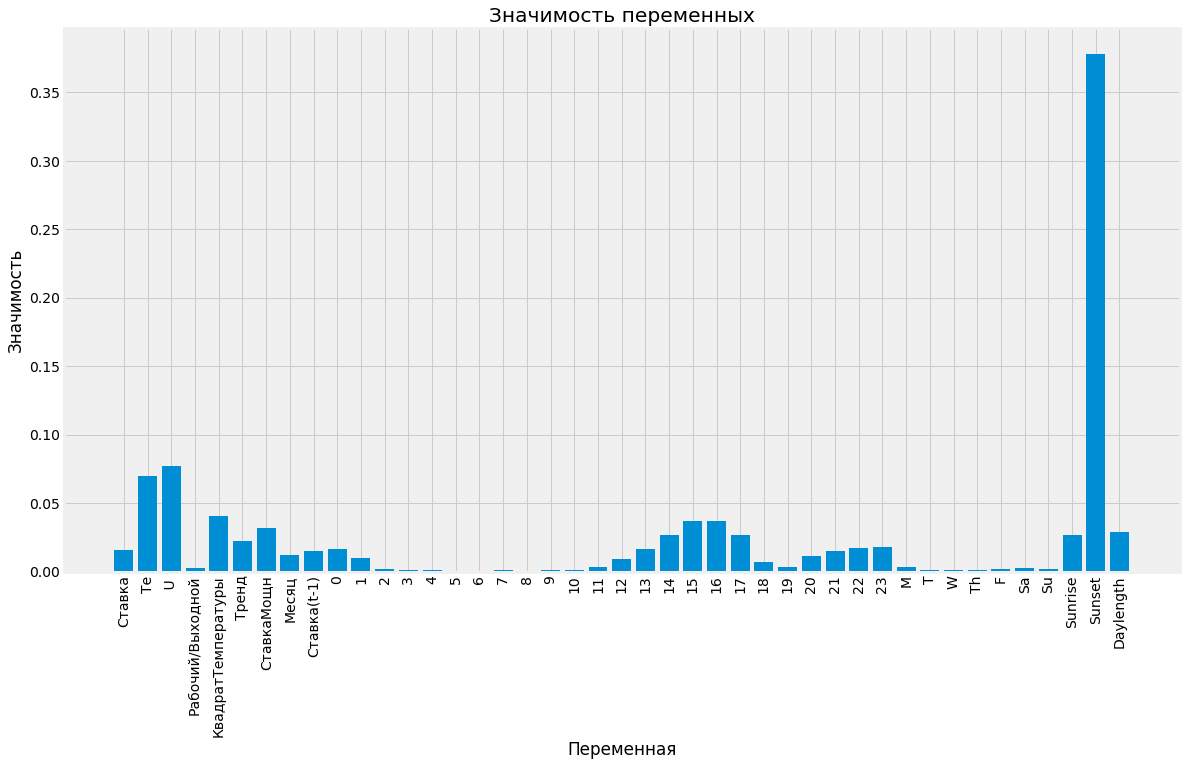

In [56]:
#%matplotlib inline
# Установить стиль
plt.figure(figsize=(20,10))
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Сделать гистограмму
plt.bar(x_values, importances, orientation = 'vertical')
# Галочки меток для оси x
plt.xticks(x_values, feature_list, rotation='vertical')
# Оси метки и заголовок
plt.ylabel('Значимость'); plt.xlabel('Переменная'); plt.title('Значимость переменных');
plt.show()

In [57]:
# Обучаем новуюю модель Случайного леса с двумя самыми важными переменными
rf_most_important = RandomForestRegressor(n_estimators= 200, random_state=42)
# Извлечь два самых важных признака (в нашем случае это печька и винный погреб)
important_indices = [feature_list.index('Sunset'), feature_list.index(' U '),feature_list.index('Te'),feature_list.index('15'),feature_list.index('16'),feature_list.index('СтавкаМощн'),]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Обучить Случайный лес
rf_most_important.fit(train_important, train_labels)
# Делать прогнозы и определять ошибку
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Показать показатели производительности
print('Средняя абсолютная ошибка:', round(np.mean(errors), 2), 'кВт.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Точность:', round(accuracy, 2), '%.')

Средняя абсолютная ошибка: 2.59 кВт.
Точность: 88.49 %.


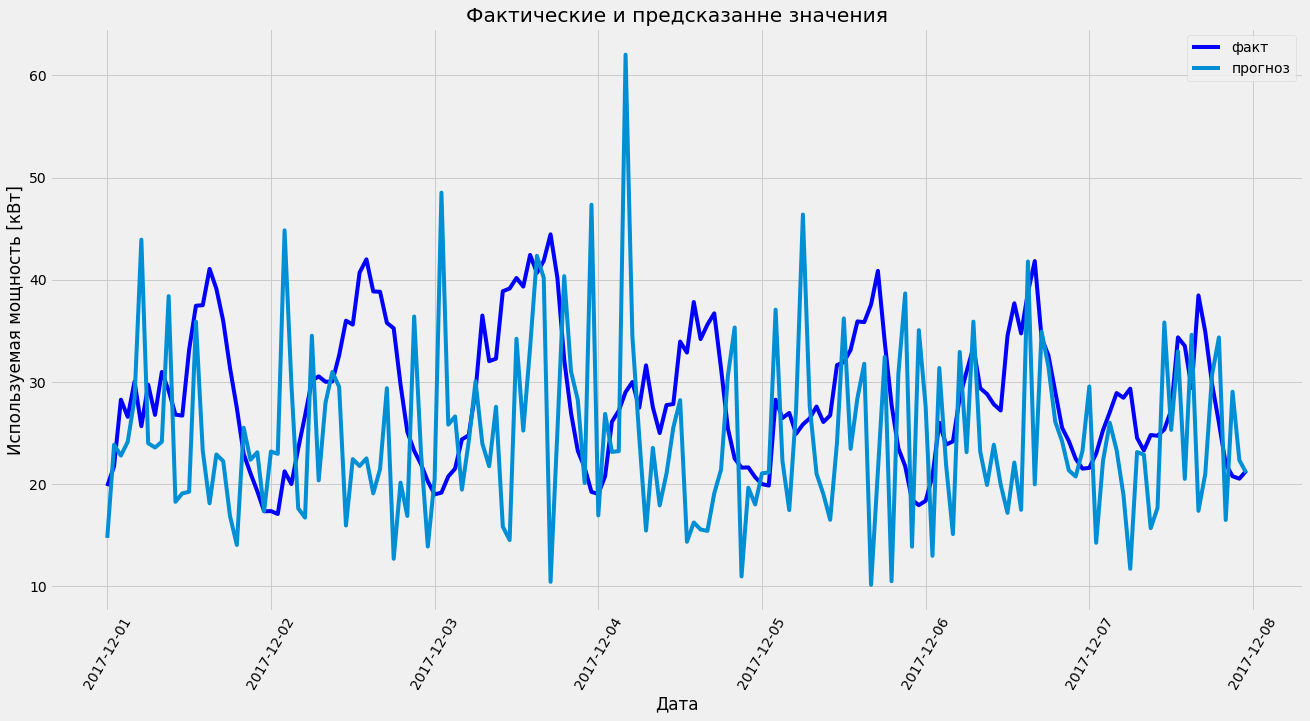

In [60]:
import datetime
# Даты тренировочных значений

dates = df["Data"][8016:8184]

# Датафрейм с истинными значениями и датами
true_data = pd.DataFrame(data = {'date': dates, 'actual': df['Потребление'][8016:8184]})


# Конвертировать в объекты даты и времени
test_dates = df["Data"][8016:8184]

# Датафрейм с прогнозами и датами
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions[0:168]})
plt.figure(figsize=(20,10))
# График фактических значений
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'факт')
# График прогнозируемых значений
plt.plot(predictions_data['date'], predictions_data['prediction'], label = 'прогноз')
plt.xticks(rotation = '60');
plt.legend()
# Графические метки
plt.xlabel('Дата'); plt.ylabel('Используемая мощность [кВт]'); plt.title('Фактические и предсказанне значения');
plt.show()
